In [1]:
# imports, setup and personal settings

# use slicer instead of imageJ
#export SITK_SHOW_COMMAND=/Applications/Slicer.app/Contents/MacOS/Slicer

import logging
import os
# change working directory to project root
os.chdir('/Users/minority/Code/Git/cardio')
print(os.getcwd())
import IPython.core.debugger as debugger

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
# enable inline plotting
%matplotlib inline
import SimpleITK as sitk
from __future__ import print_function
import importlib
from distutils.version import LooseVersion
import sys
print(sys.version)
print(sys.version_info)

# project related helper functions
from src.utils.file_wrapper.app.Files import Basefile, Nrrdfile, Dicomfile
from src.utils.file_wrapper.app.IO import FileWalker
from src.utils.myshow import myshow, myshow3d
from src.utils.utils_io import __ensure_dir__, Console_and_file_logger
Console_and_file_logger(logfile_name='reading_nrrd', log_lvl='INFO')

# for detailed debug infos
#Console_and_file_logger('ipython_sitk_stack')

# toggle detailed print messages
DETAILED_DEBUG = False

# check that all neccessary packages are installed (see requirements.txt file)
required_packages = {
    'jupyter', 'numpy', 'matplotlib', 'ipywidgets', 'scipy', 'pandas',
    'SimpleITK'
}

problem_packages = list()
# Iterate over the required packages: If the package is not installed
# ignore the exception.
for package in required_packages:
    try:
        p = importlib.import_module(package)
    except ImportError:
        problem_packages.append(package)

if len(problem_packages) is 0:
    print('All is well.')
else:
    print('The following packages are required but not installed: ' \
          + ', '.join(problem_packages))

/Users/minority/Code/Git/cardio
3.6.2 |Anaconda, Inc.| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)


/Users/minority/Code/Git/cardio/src/utils/file_wrapper/app/Files.py:4: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('TkAgg')
/Users/minority/Code/Git/cardio/src/utils/utils_io.py:7: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('TkAgg')
2018-10-21 13:17:51,466 INFO -------------------- Start --------------------
2018-10-21 13:17:51,468 INFO Filename: reading_nrrd
2018-10-21 13:17:51,470 INFO Log directory: ./logs/


Working directory: /Users/minority/Code/Git/cardio.
Log dir: ./logs/
All is well.


In [6]:
import numpy as np
import nrrd

# Some sample numpy data
filename = 'data/processed/nrrd/0706-ZY8H5791-2005-06-16/1.3.46.670589.11.0.0.11.4.2.0.5167.5.4188.2005061614221471329/1.3.46.670589.11.0.0.11.4.2.0.5167.5.2184.2005061614225865278.nrrd'
filename_2 = '/Users/minority/Code/Git/cardio/data/processed/stacked_sorted_4d/stacked_0001-02Z1L14N-2006-11-09_4d.nrrd'
# Read the data back from file
readdata, header = nrrd.read(filename)
readdata2, header2 = nrrd.read(filename_2)
print(readdata.shape)
print(readdata2.shape)
print(header)
print(header2)
# Write to a NRRD file
#nrrd.write(filename, data)

(256, 256, 1)
(192, 168, 24, 18)
OrderedDict([('type', 'double'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([256, 256,   1])), ('space directions', array([[ 1.48431051e+00, -1.38364679e-02,  5.56347736e-05],
       [ 1.38364826e-02,  1.48431046e+00, -4.05472411e-04],
       [-3.07405118e-04,  2.40678125e-03,  8.79999986e+00]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'raw'), ('space origin', array([-178.9685674 , -153.83364266, -102.59242018])), ('0008|0005', 'ISO_IR 100'), ('0008|0008', 'ORIGINAL\\\\PRIMARY\\\\M_FFE\\\\M\\\\FFE'), ('0008|0012', '20080820'), ('0008|0013', '121132'), ('0008|0014', '1.3.46.670589.11.5167.5'), ('0008|0016', '1.2.840.10008.5.1.4.1.1.4'), ('0008|0018', '1.3.46.670589.11.0.0.11.4.2.0.5167.5.2184.2005061614225865278'), ('0008|0020', '20050616'), ('0008|0021', '20050616'), ('0008|0022', '20050616'), ('0008|0023', '20050616'), ('0008|0030', '134723'), ('0008|0031', '142214.70'), ('0008|0032', 

In [6]:
"""
for faster testing
"""
class Nrrdfile_test(Nrrdfile):
    file_type = '.nrrd'

    def __init__(self, dir_name='./', filename='test.nrrd', destination='./dest'):
        """
        Opens a nrrd file from the given directory
        :param dir_name:
        :param filename:
        :param destination:
        """
        super(Nrrdfile_test, self).__init__(dir_name, filename, destination)
        self.stats['filetype'] = self.__class__.file_type
        self.img, self.header = self.__load_file__(os.path.join(dir_name, filename))
        self.describe()

    def action(self):
        """
        Single entry point for the FileWalker
        Call here all functions you would like to perform
        :return:
        """
        logging.info('Action performed at file: {}'.format(self.filename))

        return self




2018-10-21 13:24:54,325 INFO Filewrapper: Nrrdfile_test init


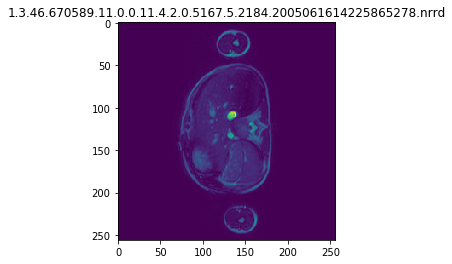

OrderedDict([('filetype', '.nrrd'),
             ('type', 'double'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([256, 256,   1])),
             ('space directions',
              array([[ 1.48431051e+00, -1.38364679e-02,  5.56347736e-05],
       [ 1.38364826e-02,  1.48431046e+00, -4.05472411e-04],
       [-3.07405118e-04,  2.40678125e-03,  8.79999986e+00]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'raw'),
             ('space origin',
              array([-178.9685674 , -153.83364266, -102.59242018])),
             ('0008|0005', 'ISO_IR 100'),
             ('0008|0008', 'ORIGINAL\\\\PRIMARY\\\\M_FFE\\\\M\\\\FFE'),
             ('0008|0012', '20080820'),
             ('0008|0013', '121132'),
             ('0008|0014', '1.3.46.670589.11.5167.5'),
             ('0008|0016', '1.2.840.10008.5.1.4.1.1.4'),
             ('0008|0018',
              '

In [7]:
import pprint
path = 'data/processed/nrrd/0706-ZY8H5791-2005-06-16/1.3.46.670589.11.0.0.11.4.2.0.5167.5.4188.2005061614221471329/'
dest = 'data/processed/nrrd_tests/'
f_name = '1.3.46.670589.11.0.0.11.4.2.0.5167.5.2184.2005061614225865278.nrrd'

nrrd_f = Nrrdfile_test(dir_name=path, filename=f_name, destination=dest )
nrrd_f.__print3d__(show=True, persist=False)

pp = pprint.PrettyPrinter(indent=1)
pp.pprint(nrrd_f.describe())
#print(nrrd_f.header)
#nrrd_f.describe()
#nrrd_f.__print3d__()





In [5]:
dcom_f = Dicomfile(path, f_name, dest)
dcom_f.__print3d__(show=True)

/Users/minority/Code/Git/cardio/venv/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [7]:
src = 'data/processed/nrrd/0706-ZY8H5791-2005-06-16/'
dir = 'data/processed/nrrd_tests/0706-ZY8H5791-2005-06-16/'

f_walker = FileWalker(src_dir= src, dest_dir=dir, file_wrapper=Nrrdfile)


2018-10-21 13:08:13,616 INFO Current src directory: data/processed/nrrd/0706-ZY8H5791-2005-06-16/
2018-10-21 13:08:13,620 INFO Current dest directory: data/processed/nrrd_tests/0706-ZY8H5791-2005-06-16/
2018-10-21 13:08:13,625 INFO Current src directory: data/processed/nrrd/0706-ZY8H5791-2005-06-16/1.3.46.670589.11.0.0.11.4.2.0.5167.5.4188.2005061614555551383
2018-10-21 13:08:13,627 INFO Current dest directory: data/processed/nrrd_tests/0706-ZY8H5791-2005-06-16/1.3.46.670589.11.0.0.11.4.2.0.5167.5.4188.2005061614555551383
2018-10-21 13:08:14,342 INFO Action performed in sub-directory data/processed/nrrd/0706-ZY8H5791-2005-06-16/1.3.46.670589.11.0.0.11.4.2.0.5167.5.4188.2005061614555551383 done in 0.716s
2018-10-21 13:08:14,343 INFO Action performed on 105 files
2018-10-21 13:08:14,346 INFO Current src directory: data/processed/nrrd/0706-ZY8H5791-2005-06-16/1.3.46.670589.11.0.0.11.4.2.0.5167.5.4188.2005061614513735374
2018-10-21 13:08:14,348 INFO Current dest directory: data/processed/n

In [10]:
from IPython.core.display import display, HTML
display(HTML('<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/1605_RC01/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"unet","geo":"DE","time":"today 12-m"}],"category":0,"property":""}, {"exploreQuery":"q=unet&geo=DE&date=today 12-m","guestPath":"https://trends.google.de:443/trends/embed/"}); </script> '))